In [354]:
from   collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   pathlib import Path
from   pprint import pprint
import seaborn as sns

%matplotlib inline

In [355]:
csv_path = Path("../data/survey_results_public.csv")
schema_path = Path("../data/survey_results_schema.csv")

In [356]:
df = pd.read_csv(csv_path, low_memory=False)
schema = pd.read_csv(schema_path)

In [357]:
is_phd = df.FormalEducation.fillna('Not reported').str.contains('Other doctoral degree')
is_compsci = df.UndergradMajor.fillna('Not reported').str.contains('Computer science')

cols = [
    'Country',
    'FormalEducation',
    'UndergradMajor',
    'CompanySize',
    'DevType',
    'YearsCoding',
    'YearsCodingProf',
    'ConvertedSalary',
    'EducationTypes',
    'SelfTaughtTypes',
    'LanguageWorkedWith',
    'DatabaseWorkedWith',
    'PlatformWorkedWith',
    'FrameworkWorkedWith',
    'HoursComputer',
    'HoursOutside',
    'Exercise',
    'Gender',
    'SexualOrientation',
    'EducationParents',
    'RaceEthnicity',
    'Age',
    'Dependents',
]

df = df[cols]

In [358]:
df.shape

(98855, 23)

In [359]:
df.isnull().all(axis=1).sum()

412

In [360]:
df.isnull().sum()

Country                  412
FormalEducation         4152
UndergradMajor         19819
CompanySize            27324
DevType                 6757
YearsCoding             5020
YearsCodingProf        20952
ConvertedSalary        51153
EducationTypes         30895
SelfTaughtTypes        41501
LanguageWorkedWith     20521
DatabaseWorkedWith     32585
PlatformWorkedWith     32856
FrameworkWorkedWith    47235
HoursComputer          26722
HoursOutside           26831
Exercise               26747
Gender                 34386
SexualOrientation      39090
EducationParents       37042
RaceEthnicity          41382
Age                    34281
Dependents             36259
dtype: int64

In [361]:
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=0, how='any', subset=['ConvertedSalary'])
df = df.reset_index()

In [362]:
df.shape

(47702, 24)

In [363]:
df.isnull().sum()

index                      0
Country                    0
FormalEducation          694
UndergradMajor          5319
CompanySize             6742
DevType                  337
YearsCoding               19
YearsCodingProf          737
ConvertedSalary            0
EducationTypes          1853
SelfTaughtTypes         7438
LanguageWorkedWith      1220
DatabaseWorkedWith      7114
PlatformWorkedWith      7325
FrameworkWorkedWith    15097
HoursComputer           1718
HoursOutside            1772
Exercise                1697
Gender                  3171
SexualOrientation       5262
EducationParents        4266
RaceEthnicity           6490
Age                     2865
Dependents              3673
dtype: int64

In [364]:
df = df.drop(columns=['FrameworkWorkedWith'])

In [365]:
df.head()

,index,Country,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,...,PlatformWorkedWith,HoursComputer,HoursOutside,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents
0,1,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,70841.0,"Taught yourself a new language, framework, or ...",...,Linux,5 - 8 hours,30 - 59 minutes,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes
1,4,South Africa,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,0-2 years,21426.0,Taken a part-time in-person course in programm...,...,Arduino;Windows Desktop or Server,Over 12 hours,1 - 2 hours,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes
2,5,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,6-8 years,3-5 years,41671.0,Received on-the-job training in software devel...,...,Linux,9 - 12 hours,30 - 59 minutes,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No
3,6,United States,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,9-11 years,0-2 years,120000.0,Received on-the-job training in software devel...,...,Linux,Over 12 hours,Less than 30 minutes,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No
4,8,United States,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,21-23 years,250000.0,Taken an online course in programming or softw...,...,Amazon Echo;AWS;iOS;Linux;Mac OS;Serverless,9 - 12 hours,Less than 30 minutes,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes


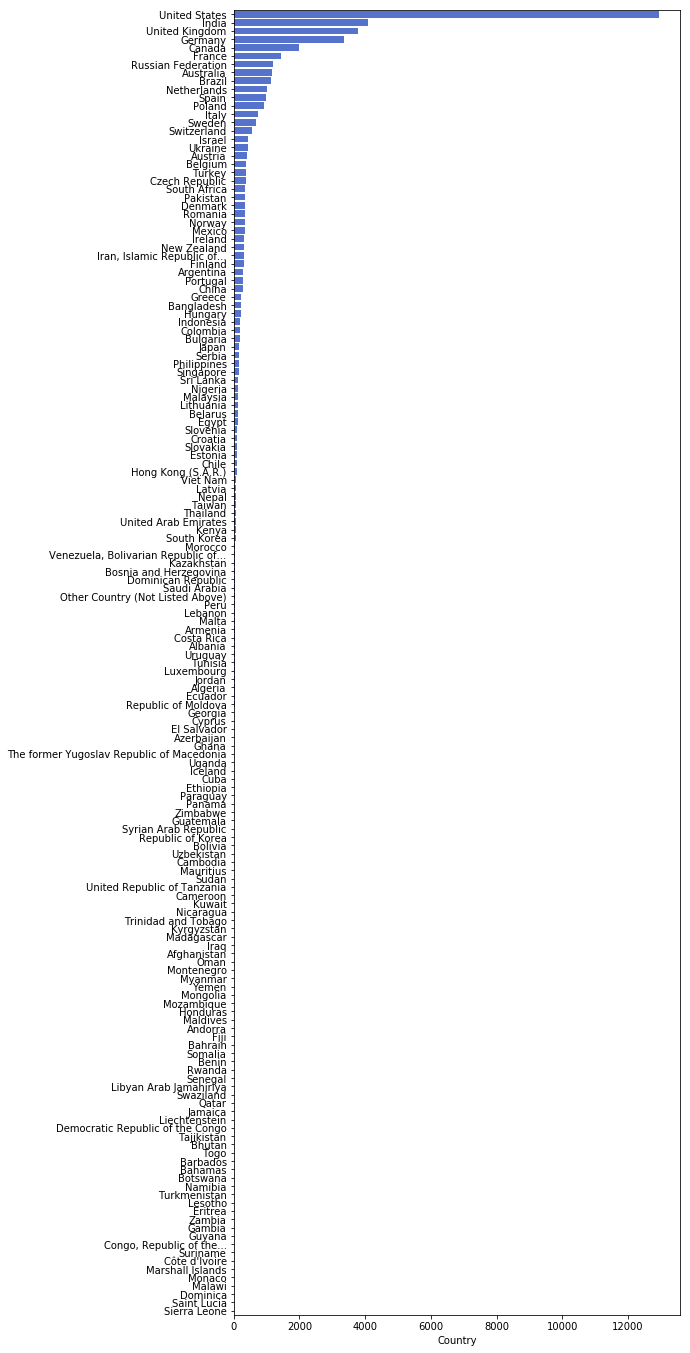

In [366]:
plt.figure(figsize=(8, 24))
sns.barplot(x=df.Country.value_counts(), y=df.Country.value_counts().index, color='royalblue')
plt.show()

In [367]:
df.Country.value_counts()['China']

270

In [368]:
country_counts = df.Country.value_counts()
low_rep_countries = list(country_counts[country_counts < 250].index)

In [369]:
df.loc[df.Country.isin(low_rep_countries), 'Country'] = 'other'

In [370]:
one_hot_countries = pd.get_dummies(df.Country, prefix='Country').head()
df = pd.concat([df, one_hot_countries], axis=1)
df = df.drop(columns=['Country'])

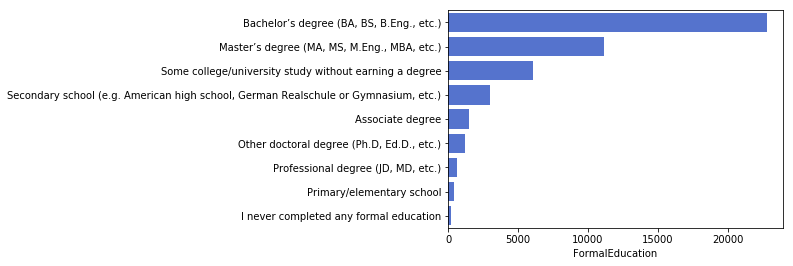

In [371]:
sns.barplot(x=df.FormalEducation.value_counts(), y=df.FormalEducation.value_counts().index, color='royalblue')
plt.show()

In [372]:
formal_education = pd.get_dummies(df.FormalEducation, prefix='FormalEducation')
df = pd.concat([df, formal_education], axis=1)
df = df.drop(columns=['FormalEducation'])

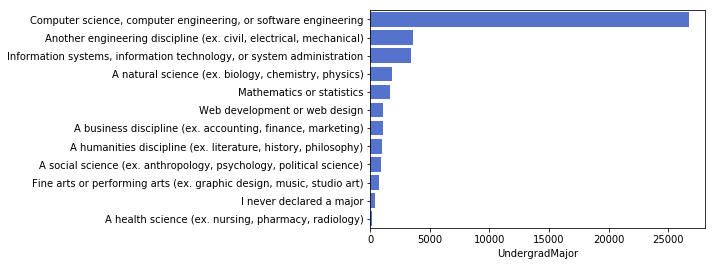

In [373]:
sns.barplot(x=df.UndergradMajor.value_counts(), y=df.UndergradMajor.value_counts().index, color='royalblue')
plt.show()

In [374]:
undergrad = pd.get_dummies(df.UndergradMajor, prefix='UndergradMajor')
df = pd.concat([df, undergrad], axis=1)
df = df.drop(columns=['UndergradMajor'])

In [375]:
pprint(list(df.CompanySize.unique()))

['10,000 or more employees',
 '10 to 19 employees',
 '100 to 499 employees',
 '20 to 99 employees',
 '1,000 to 4,999 employees',
 '500 to 999 employees',
 '5,000 to 9,999 employees',
 'Fewer than 10 employees',
 nan]


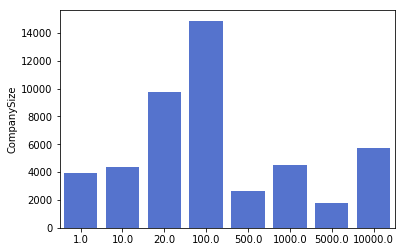

In [376]:
company_size_mapping = {
    'Fewer than 10 employees': 1,
    '10 to 19 employees': 10,
    '20 to 99 employees': 20,
    '100 to 499 employees': 100,
    '500 to 999 employees': 500,
    '1,000 to 4,999 employees': 1000,
    '5,000 to 9,999 employees': 5000,
    '10,000 or more employees': 10000,
    np.nan: np.nan,
}

company_size = df.CompanySize.map(company_size_mapping)
company_size = company_size.fillna(company_size.median())

sns.barplot(x=company_size.value_counts().index, y=company_size.value_counts(), color='royalblue')
plt.show()

In [377]:
pprint(list(df.YearsCoding.unique()))

['30 or more years',
 '6-8 years',
 '9-11 years',
 '0-2 years',
 '15-17 years',
 '18-20 years',
 '3-5 years',
 '12-14 years',
 '24-26 years',
 '21-23 years',
 '27-29 years',
 nan]


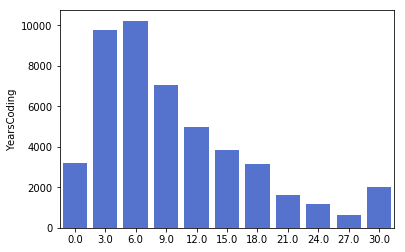

In [378]:
years_coding_mapping = {
    '0-2 years': 0,
    '3-5 years': 3,
    '6-8 years': 6,
    '9-11 years': 9,
    '12-14 years': 12,
    '15-17 years': 15,
    '18-20 years': 18,
    '21-23 years':21,
    '24-26 years': 24,
    '27-29 years': 27,
    '30 or more years': 30,
    np.nan: np.nan,
}

years_coding = df.YearsCoding.map(years_coding_mapping)
years_coding = years_coding.fillna(years_coding.median())

sns.barplot(x=years_coding.value_counts().index, y=years_coding.value_counts(), color='royalblue')
plt.show()

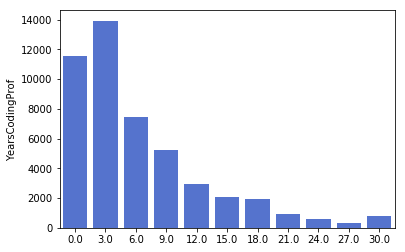

In [379]:
years_coding_prof = df.YearsCodingProf.map(years_coding_mapping)
years_coding_prof = years_coding_prof.fillna(years_coding_prof.median())

sns.barplot(x=years_coding_prof.value_counts().index, y=years_coding_prof.value_counts(), color='royalblue')
plt.show()

In [406]:
class DefaultEntry:
    """Default record for a dictionary or DataFrame
    
    Attributes
    ----------
    _keys : list
        Keys (or column names) in the collection
    _default_value : int
        The default value to assign to each key
    _row_dict : dict
        key, default value pairs for one default record
    """
    
    def __init__(self, keys, default_value=0):
        """Instantiate object
        
        keys : list
            Keys (or column names) in the collection
        default_value : int, optional
            The default value to assign to each key
        """
        self._keys = keys
        self._default_value = default_value
        self._row_dict = {key: default_value for key in keys}
        
    def to_dict(self):
        return self._row_dict

    def to_df(self):
        return pd.DataFrame(self._row_dict)
    

def expand_col(col, prefix=''):
    """For a column that can be a multi-category answer, break into constituent answers
    
    Parameters
    ----------
    col : pandas.Series
        The column to be processed
    prefix : str, optional
        Prefix to prepend to each category name
        
    Returns
    -------
    pd.DataFrame
        The expanded column
    """
    
    unique_categories = set()
    for entry in col:
        if entry is np.nan:
            pass
        else:
            unique_categories.update(entry.split(';'))
            
    new_cols = []
    for entry in col:
        if entry is np.nan:
            new_cols.append(DefaultEntry(unique_categories).to_dict())
        else:
            new_entry = DefaultEntry(unique_categories).to_dict()
            new_entry.update(dict(Counter(entry.split(';'))))
            new_cols.append(new_entry)

    new_cols = pd.DataFrame(new_cols)
    if prefix:
        new_cols.columns = [prefix + "_" + name for name in new_cols.columns]
    
    return new_cols

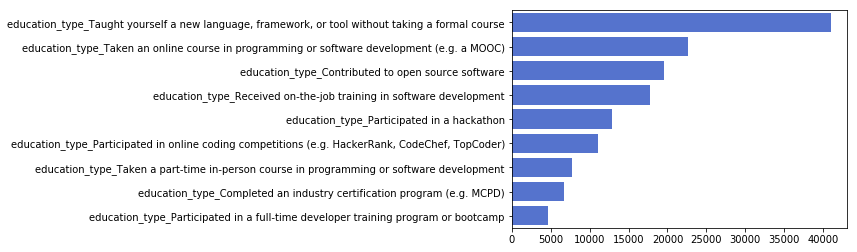

In [387]:
education_types = expand_col(df.EducationTypes, "education_type")
education_types_summary = education_types.sum().sort_values(ascending=False)
sns.barplot(x=education_types_summary, y=education_types_summary.index, color='royalblue')
plt.show()

In [388]:
df = pd.concat([df, education_types], axis=1)
df = df.drop(columns=['EducationTypes'])

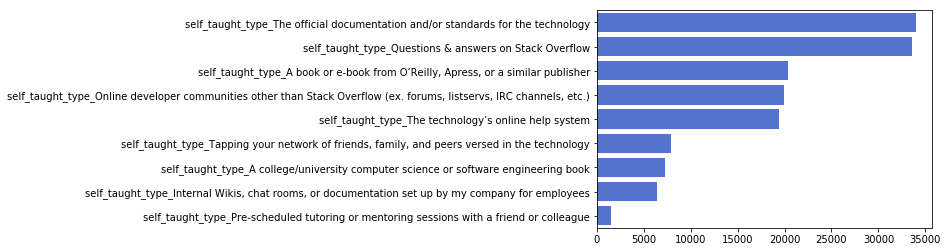

In [390]:
self_taught_types = expand_col(df.SelfTaughtTypes, prefix="self_taught_type")
self_taught_summary = self_taught_types.sum().sort_values(ascending=False)
sns.barplot(x=self_taught_summary, y=self_taught_summary.index, color='royalblue')
plt.show()

In [391]:
df = pd.concat([df, self_taught_types], axis=1)
df = df.drop(columns=['SelfTaughtTypes'])

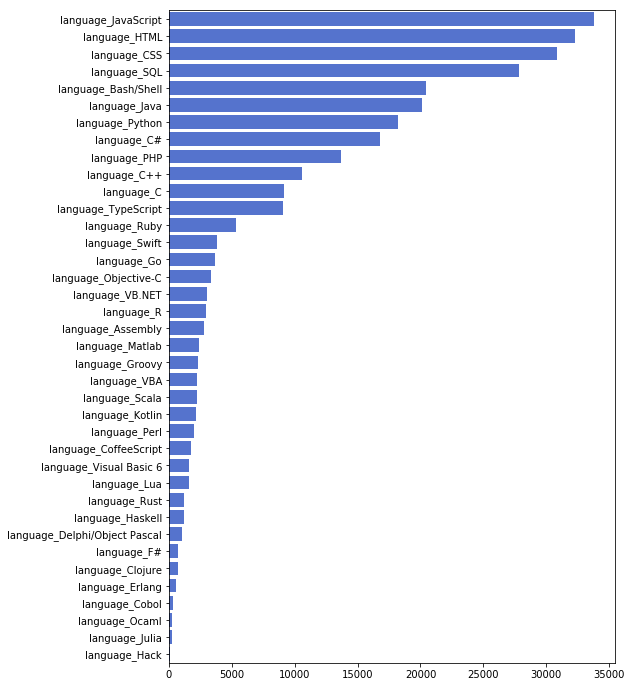

In [392]:
#LanguageWorkedWith
languages = expand_col(df.LanguageWorkedWith, prefix="language")
languages_summary = languages.sum().sort_values(ascending=False)
plt.figure(figsize=(8, 12))
sns.barplot(x=languages_summary, y=languages_summary.index, color='royalblue')
plt.show()

In [393]:
df = pd.concat([df, languages], axis=1)
df = df.drop(columns=['LanguageWorkedWith'])

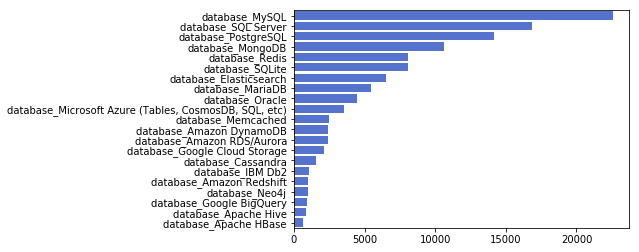

In [394]:
databases = expand_col(df.DatabaseWorkedWith, prefix='database')
databases_summary = databases.sum().sort_values(ascending=False)
sns.barplot(x=databases_summary, y=databases_summary.index, color='royalblue')
plt.show()

In [395]:
df = pd.concat([df, databases], axis=1)
df = df.drop(columns=['DatabaseWorkedWith'])

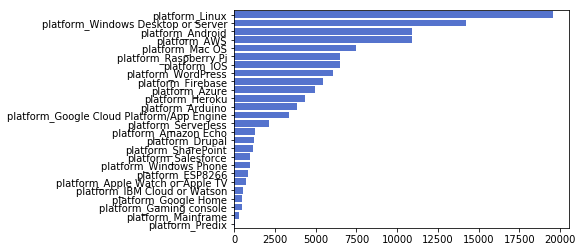

In [396]:
platforms = expand_col(df.PlatformWorkedWith, prefix='platform')
platforms_summary = platforms.sum().sort_values(ascending=False)
sns.barplot(x=platforms_summary, y=platforms_summary.index, color='royalblue')
plt.show()

In [397]:
df = pd.concat([df, platforms], axis=1)
df = df.drop(columns=['PlatformWorkedWith'])

In [398]:
pprint(list(df.HoursComputer.unique()))

['5 - 8 hours',
 'Over 12 hours',
 '9 - 12 hours',
 '1 - 4 hours',
 nan,
 'Less than 1 hour']


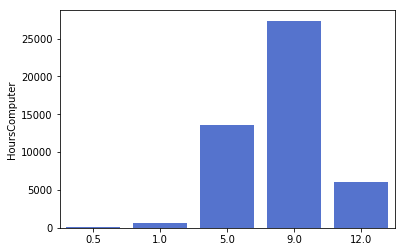

In [399]:
hours_computer_mapping = {
    'Less than 1 hour': 0.5,
    '1 - 4 hours': 1,
    '5 - 8 hours': 5,
    '9 - 12 hours': 9,
    'Over 12 hours': 12,
    np.nan: np.nan,
}

hours_computer = df.HoursComputer.map(hours_computer_mapping)
hours_computer = hours_computer.fillna(hours_computer.median())

sns.barplot(x=hours_computer.value_counts().index, y=hours_computer.value_counts(), color='royalblue')
plt.show()

In [400]:
pprint(list(df.HoursOutside.unique()))

['30 - 59 minutes',
 '1 - 2 hours',
 'Less than 30 minutes',
 '3 - 4 hours',
 'Over 4 hours',
 nan]


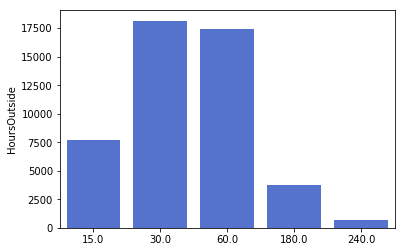

In [401]:
hours_outside_mapping = {
    'Less than 30 minutes': 15,
    '30 - 59 minutes': 30,
    '1 - 2 hours': 60,
    '3 - 4 hours': 180,
    'Over 4 hours': 240,
    np.nan: np.nan,
}

hours_outside = df.HoursOutside.map(hours_outside_mapping)
hours_outside = hours_outside.fillna(hours_outside.median())

sns.barplot(x=hours_outside.value_counts().index, y=hours_outside.value_counts(), color='royalblue')
plt.show()

In [402]:
pprint(list(df.Exercise.unique()))

['Daily or almost every day',
 '3 - 4 times per week',
 '1 - 2 times per week',
 "I don't typically exercise",
 nan]


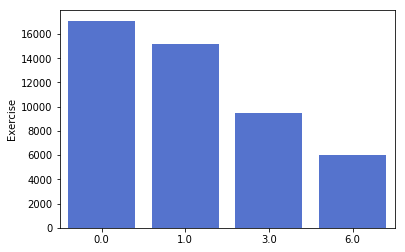

In [403]:
exercise_mapping = {
    "I don't typically exercise": 0,
    '1 - 2 times per week': 1,
    '3 - 4 times per week': 3,
    'Daily or almost every day': 6,
     np.nan: np.nan,
}

exercise = df.Exercise.map(exercise_mapping)
exercise = exercise.fillna(exercise.median())

sns.barplot(x=exercise.value_counts().index, y=exercise.value_counts(), color='royalblue')
plt.show()

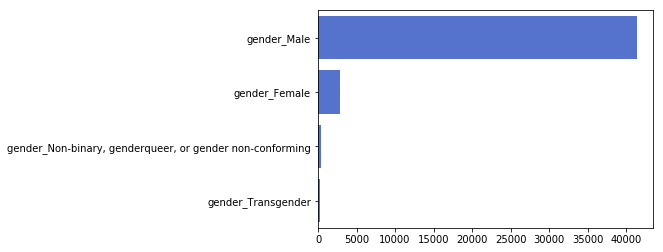

In [404]:
gender = expand_col(df.Gender, prefix='gender')
gender_summary = gender.sum().sort_values(ascending=False)
sns.barplot(x=gender_summary, y=gender_summary.index, color='royalblue')
plt.show()

In [405]:
df = pd.concat([df, gender], axis=1)
df = df.drop(columns=['Gender'])

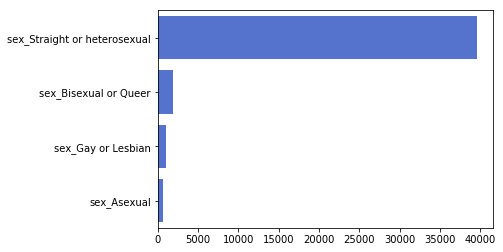

In [408]:
sex = expand_col(df.SexualOrientation, prefix='sex')
sex_summary = sex.sum().sort_values(ascending=False)
sns.barplot(x=sex_summary, y=sex_summary.index, color='royalblue')
plt.show()

In [409]:
df = pd.concat([df, sex], axis=1)
df = df.drop(columns=['SexualOrientation'])

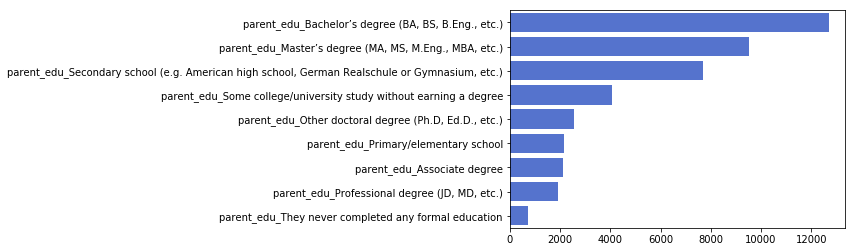

In [410]:
parents = expand_col(df.EducationParents, prefix='parent_edu')
parents_summary = parents.sum().sort_values(ascending=False)
sns.barplot(x=parents_summary, y=parents_summary.index, color='royalblue')
plt.show()

In [411]:
df = pd.concat([df, parents], axis=1)
df = df.drop(columns=['EducationParents'])

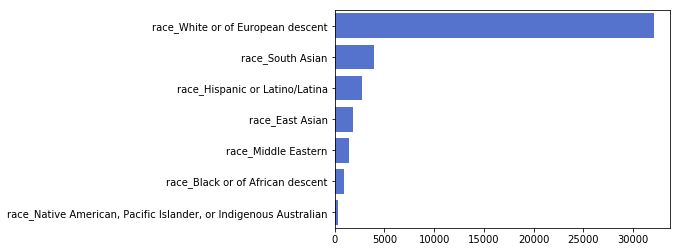

In [412]:
race = expand_col(df.RaceEthnicity, prefix='race')
race_summary = race.sum().sort_values(ascending=False)
sns.barplot(x=race_summary, y=race_summary.index, color='royalblue')
plt.show()

In [414]:
df = pd.concat([df, race], axis=1)
df = df.drop(columns=["RaceEthnicity"])

In [415]:
pprint(list(df.Age.unique()))

['35 - 44 years old',
 '18 - 24 years old',
 '25 - 34 years old',
 '45 - 54 years old',
 nan,
 '55 - 64 years old',
 'Under 18 years old',
 '65 years or older']


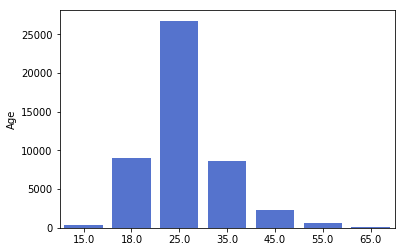

In [416]:
age_mapping = {
    'Under 18 years old': 15,
    '18 - 24 years old': 18,
    '25 - 34 years old': 25,
    '35 - 44 years old': 35,
    '45 - 54 years old': 45,
    '55 - 64 years old': 55,
    '65 years or older': 65,
    np.nan: np.nan, 
}

age = df.Age.map(age_mapping)
age = age.fillna(age.median())

sns.barplot(x=age.value_counts().index, y=age.value_counts(), color='royalblue')
plt.show()

In [418]:
df.Age = age

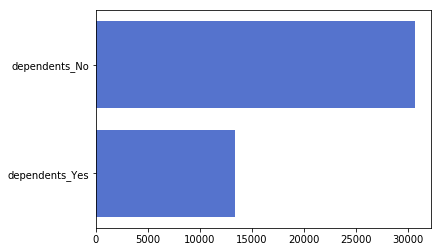

In [420]:
dependents = expand_col(df.Dependents, prefix='dependents')
dependents_summary = dependents.sum().sort_values(ascending=False)
sns.barplot(x=dependents_summary, y=dependents_summary.index, color='royalblue')
plt.show()

In [421]:
df = pd.concat([df, dependents], axis=1)
df = df.drop(columns=['Dependents'])

## Finally doing it!!!

In [446]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [447]:
X = df_cleaned.drop(axis=1, labels='ConvertedSalary')
y = df_cleaned.ConvertedSalary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

train_r2_score = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R2: {train_r2_score}")
print(f"Train MSE: {train_mse}")
print(f"Test R2: {test_r2_score}")
print(f"Test MSE: {test_mse}")

Train R2: 0.04041907958373059
Train MSE: 39128711714.30795
Test R2: 0.03615659683935968
Test MSE: 40107034635.66047


In [448]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_test_pred)

0.03619409523128525

Drop outliers?

In [449]:
df_drop_outliers = df_cleaned[df_cleaned.ConvertedSalary < 250000]

In [450]:
X = df_drop_outliers.drop(axis=1, labels='ConvertedSalary')
y = df_drop_outliers.ConvertedSalary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

train_r2_score = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R2: {train_r2_score}")
print(f"Train MSE: {train_mse}")
print(f"Test R2: {test_r2_score}")
print(f"Test MSE: {test_mse}")

Train R2: 0.40036549287563894
Train MSE: 1226809552.0668216
Test R2: 0.3999853007502785
Test MSE: 1260207152.215957


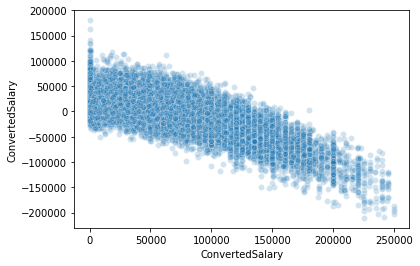

In [451]:
train_resid = y_train_pred - y_train
sns.scatterplot(y_train, train_resid, alpha=0.2)
plt.show()

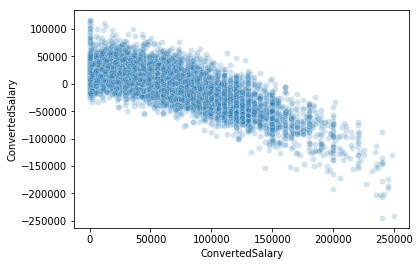

In [452]:
test_resid = y_test_pred - y_test
sns.scatterplot(y_test, test_resid, alpha=0.2)
plt.show()

In [453]:
y = np.sqrt(df_drop_outliers.ConvertedSalary.values + 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

train_r2_score = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R2: {train_r2_score}")
print(f"Train MSE: {train_mse}")
print(f"Test R2: {test_r2_score}")
print(f"Test MSE: {test_mse}")

Train R2: 0.437253255140887
Train MSE: 5574.473887434798
Test R2: 0.43779942345380096
Test MSE: 5643.252052922042


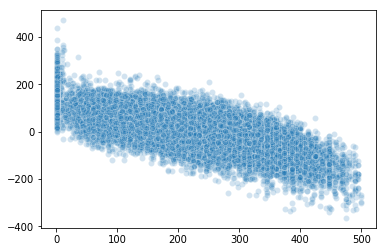

In [454]:
train_resid = y_train_pred - y_train
sns.scatterplot(y_train, train_resid, alpha=0.2)
plt.show()

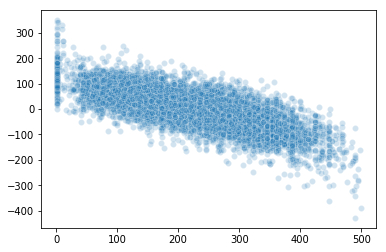

In [455]:
test_resid = y_test_pred - y_test
sns.scatterplot(y_test, test_resid, alpha=0.2)
plt.show()

In [457]:
feature_weights = pd.DataFrame({'feature': X_train.columns, 'weight': lm.coef_}).sort_values(by='weight')
print(feature_weights[:10])
print(feature_weights[-10:])

                                              feature     weight
27                                            Student -56.071373
47                               Delphi/Object Pascal -25.705365
63                                                PHP -20.340593
22                         Game or graphics developer -14.662927
17                    Educator or academic researcher -12.981892
40                                                  C -12.715574
35  Taken a part-time in-person course in programm... -12.679633
24                                   Mobile developer -12.606349
75                                     Visual Basic 6 -12.537482
45                                              Cobol -10.068755
                                              feature     weight
44                                            Clojure  13.431055
32                        Participated in a hackathon  14.625915
67                                               Ruby  15.023204
39                       

/Users/joshtice/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


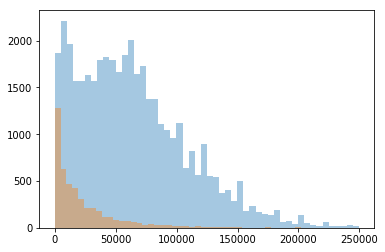

In [461]:
sns.distplot(df_drop_outliers.loc[df_drop_outliers.Student == 0]['ConvertedSalary'].values, kde=False)
sns.distplot(df_drop_outliers.loc[df_drop_outliers.Student == 1]['ConvertedSalary'].values, kde=False)
plt.show()

In [506]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(alphas=[0.0001, 0.0003, 0.001, 0.003, 0.01], cv=3, n_jobs=2, normalize=True, random_state=42)
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=[0.0001, 0.0003, 0.001, 0.003, 0.01], copy_X=True, cv=3,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=2,
    normalize=True, positive=False, precompute='auto', random_state=42,
    selection='cyclic', tol=0.0001, verbose=False)

In [507]:
lasso_cv_model.score(X_train, y_train)

0.436995507540815

In [508]:
lasso_cv_model.score(X_test, y_test)

0.43724432703748983

In [509]:
lasso_cv_model.alpha_

0.001

In [511]:
coefs = pd.DataFrame.from_records(zip(X_train.columns.values, lasso_cv_model.coef_)).sort_values(by=1)

In [541]:
coefs.loc[abs(coefs[1]) > 5]

,0,1
27,Student,-56.206395
47,Delphi/Object Pascal,-24.802555
63,PHP,-20.170158
22,Game or graphics developer,-14.005439
40,C,-12.426568
35,Taken a part-time in-person course in programm...,-12.237217
17,Educator or academic researcher,-12.041832
24,Mobile developer,-11.974962
75,Visual Basic 6,-11.832129
45,Cobol,-8.234171


In [515]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
random_forest_model = RandomForestRegressor(random_state=42)

kfold = KFold(n_splits=5, random_state=42)
results = cross_validate(random_forest_model, X_train, y_train, scoring='r2', cv=kfold)

/Users/joshtice/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/joshtice/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/joshtice/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/joshtice/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/joshtice/anaconda3/lib/py

In [517]:
results['test_score'].mean()

0.3878127133820404

In [519]:
r2_score(y_test, random_forest_model.predict(X_test))

0.4028123152862586

In [524]:
feature_importance = pd.DataFrame.from_records(
    zip(X_train.columns.values, random_forest_model.feature_importances_)).sort_values(by=1, ascending=False
)
feature_importance

,0,1
2,YearsCodingProf,0.249465
0,CompanySize,0.052326
27,Student,0.050450
1,YearsCoding,0.045251
4,HoursOutside,0.044296
5,Exercise,0.031270
6,Age,0.025140
39,Bash/Shell,0.023434
3,HoursComputer,0.023230
63,PHP,0.018567


In [558]:
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK

def rand_forest_objective(params, n_folds=5):
    """Provide an objective to minimize for hyperopt
    
    Parameters
    ----------
    model : sklearn type regressor
    n_folds : int
        Number of folds to use for Kfold cross validation
    
    Returns
    -------
    float
        1 - R2 score, for minimization
    """
    model = RandomForestRegressor(**params, n_jobs=-1, random_state=42)
    kfold = KFold(n_splits=n_folds, random_state=42)
    results = cross_validate(model, X_train, y_train, scoring='r2', cv=kfold)
    avg_score = results['test_score'].mean()
    loss = 1 - avg_score
    
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
    

space = {
    'n_estimators': hp.choice('n_estimators', np.arange(1, 100, dtype=int)),
    'max_depth': hp.choice('max_depth', np.arange(1, 100, dtype=int)),
    'min_samples_split': hp.choice('min_samples_split', np.arange(2, 100, dtype=int)),
    'max_features': hp.choice('max_features', np.arange(1, X_train.shape[1], dtype=int)),
}
bayes_trials = Trials()
best_random_forest = fmin(fn=rand_forest_objective, space=space, algo=tpe.suggest, max_evals=100, trials=bayes_trials)

100%|██████████| 100/100 [33:32<00:00, 25.28s/it, best loss: 0.5392741456793765]


In [559]:
best_random_forest

{'max_depth': 35,
 'max_features': 13,
 'min_samples_split': 7,
 'n_estimators': 98}

In [576]:
opt_rand_forest = RandomForestRegressor(**best_random_forest, n_jobs=-1, random_state=42)
opt_rand_forest.fit(X_train, y_train)
kfold = KFold(n_splits=5, random_state=42)
results = cross_validate(opt_rand_forest, X_train, y_train, scoring='r2', cv=kfold)
results['test_score'].mean()

0.4606859332259157

In [563]:
feature_importance = pd.DataFrame.from_records(
    zip(X_train.columns.values, opt_rand_forest.feature_importances_)).sort_values(by=1, ascending=False
)
feature_importance.columns = ['Feature', 'Importance']
feature_importance.head(10)

,Feature,Importance
2,YearsCodingProf,0.138046
1,YearsCoding,0.114564
6,Age,0.085973
27,Student,0.056616
0,CompanySize,0.050320
4,HoursOutside,0.046601
5,Exercise,0.024010
39,Bash/Shell,0.021419
3,HoursComputer,0.021334
63,PHP,0.018703


In [565]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_validate

xgb_model = XGBRegressor(objective='reg:squarederror', seed=42)
kfold = KFold(n_splits=5, random_state=42)
results = cross_validate(xgb_model, X_train, y_train, scoring='r2', cv=kfold)

In [566]:
results['test_score'].mean()

0.46099866456167204

In [567]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbosity=1)

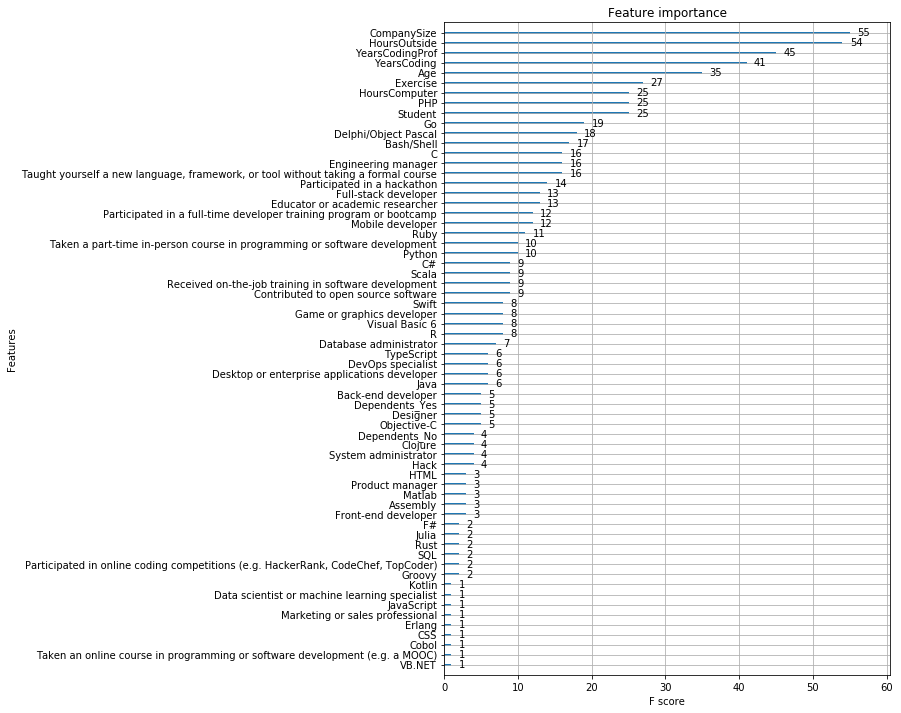

In [570]:
fig, ax = plt.subplots(figsize=(8, 12))
xgboost.plot_importance(xgb_model, ax=ax)
plt.show()

In [574]:
def xgboost_objective(params, n_folds=5):
    """Provide an objective to minimize for hyperopt
    
    Parameters
    ----------
    model : sklearn type regressor
    n_folds : int
        Number of folds to use for Kfold cross validation
    
    Returns
    -------
    float
        1 - R2 score, for minimization
    """
    
    model = XGBRegressor(**params, objective='reg:squarederror', n_jobs=2, random_state=42)
    kfold = KFold(n_splits=n_folds, random_state=42)
    results = cross_validate(model, X_train, y_train, scoring='r2', cv=kfold)
    avg_score = results['test_score'].mean()
    loss = 1 - avg_score
    
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
    

space = {
    'max_depth': hp.choice('max_depth', np.arange(1, 100, dtype=int)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
    'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
    'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
    'n_estimators': hp.choice('n_estimators', np.arange(1, 100, dtype=int)),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0)
}

bayes_trials = Trials()
best_xgboost = fmin(fn=xgboost_objective, space=space, algo=tpe.suggest, max_evals=100, trials=bayes_trials)

100%|██████████| 100/100 [3:28:28<00:00, 109.33s/it, best loss: 0.5283912641683081]


In [575]:
best_xgboost

{'colsample_by_tree': 0.6316401321168544,
 'learning_rate': 0.10137256988852777,
 'max_depth': 7,
 'min_child_samples': 410.0,
 'n_estimators': 60,
 'num_leaves': 75.0,
 'reg_alpha': 0.1285129773319354,
 'reg_lambda': 0.8376773907255536}

In [578]:
opt_xgboost = XGBRegressor(**best_xgboost, n_jobs=2, random_state=42)
opt_xgboost.fit(X_train, y_train)

[07:23:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree',
       colsample_by_tree=0.6316401321168544, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.10137256988852777,
       max_delta_step=0, max_depth=7, min_child_samples=410.0,
       min_child_weight=1, missing=None, n_estimators=60, n_jobs=2,
       nthread=None, num_leaves=75.0, objective='reg:linear',
       random_state=42, reg_alpha=0.1285129773319354,
       reg_lambda=0.8376773907255536, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

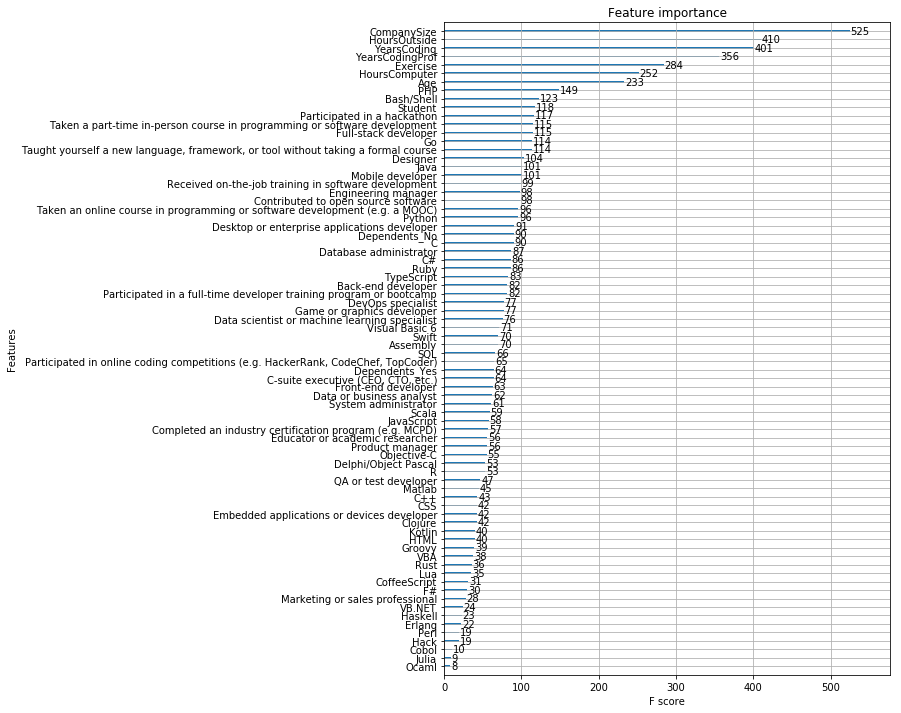

In [580]:
fig, ax = plt.subplots(figsize=(8, 12))
xgboost.plot_importance(opt_xgboost, ax=ax)
plt.show()

In [581]:
r2_score(y_test, opt_xgboost.predict(X_test))

0.47359511726607517

https://towardsdatascience.com/automated-machine-learning-hyperparameter-tuning-in-python-dfda59b72f8ahttps://towardsdatascience.com/automated-machine-learning-hyperparameter-tuning-in-python-dfda59b72f8a